<a href="https://colab.research.google.com/github/LucasLuckyxD/Portfolio-Project/blob/main/DS_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Libaries***

In [ ]:
import pandas as pd
import seaborn as sns

***Mounting Google Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Reading the Dataset From Google Drive***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Pandas/ds salaries/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


***Checking The Dataset(Data Types, Missing Values and unused Colomn)***

In [ ]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
df.isnull().values.any()

False



***>  There are no NaN values in the Dataset***


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

***Changing The Remote Ratio into a more comfortable format***

> 0 = WFO (Work From Office)

> 100 = WFH (Work From Home)

> 50 = Mixed


In [ ]:
df['remote_ratio'] = df['remote_ratio'].replace({0:'WFO',100:'WFH',50:'Mixed'})

***Changing The Remote Ratio into a more comfortable format***

> EN = Entry Level (Junior)

> MI = Mid-level (Intermediate)

> SE = Senior Level (Expert)

> EX = Exectuives (Director)

In [ ]:
df['experience_level'] = df['experience_level'].replace({'EN':'Entry Level (Junior)','MI':'Mid-Level (Intermediate)','SE':'Senior Level (Expert)','EX':'Executives (Director)'})

***How Much Do Data Analyst that worked in The US Make ??***

In [ ]:
data_analyst_group_in_US = df.groupby(['job_title','company_location'])
data_analyst_group_in_US.get_group(('Data Analyst','US'))['salary_in_usd'].mean()

107674.15492957746

***How Much do Data Analyst Make in general (Mean) ??***

In [ ]:
data_analyst_group = df.groupby('job_title')
data_analyst_group.get_group('Data Analyst')['salary_in_usd'].mean()

92893.06185567011

***How Much Entry Level Data Analyst make in the US ?***

In [ ]:
entry_level_data_analyst_group_in_US = df.groupby(['job_title','company_location','experience_level'])
entry_level_data_analyst_group_in_US.get_group(('Data Analyst','US','Entry Level (Junior)'))['salary_in_usd'].mean()

73833.33333333333

***How Much Mid Level Data Analyst make in the US ?***

In [ ]:
entry_level_data_analyst_group_in_US = df.groupby(['job_title','company_location','experience_level'])
entry_level_data_analyst_group_in_US.get_group(('Data Analyst','US','Mid-Level (Intermediate)'))['salary_in_usd'].mean()

95750.66666666667

***How Much Senior Level Data Analyst make in the US ?***

In [ ]:
entry_level_data_analyst_group_in_US = df.groupby(['job_title','company_location','experience_level'])
entry_level_data_analyst_group_in_US.get_group(('Data Analyst','US','Senior Level (Expert)'))['salary_in_usd'].mean()

115116.77083333333

***How Much Executive Level Data Analyst make in the US ?***

In [ ]:
entry_level_data_analyst_group_in_US = df.groupby(['job_title','company_location','experience_level'])
entry_level_data_analyst_group_in_US.get_group(('Data Analyst','US','Executives (Director)'))['salary_in_usd'].mean()

120000.0

***Entry Level vs Mid Level vs Senior Level vs Executive Level***

In [ ]:
group_for_line_plot = df.groupby(['job_title','company_location'])
df_for_line_plot = group_for_line_plot.get_group(('Data Analyst','US')).reset_index()

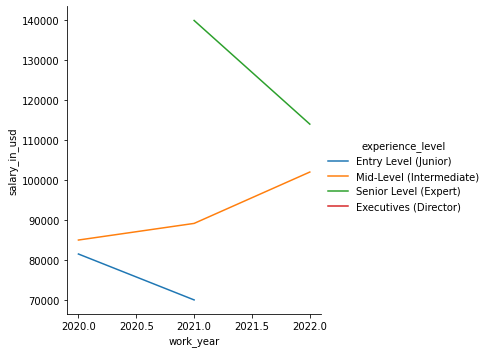

In [ ]:
sns.relplot(y='salary_in_usd',x='work_year',data=df_for_line_plot,hue='experience_level',ci=None,kind='line')

***Entry Level vs Mid Level vs Senior Level vs Executive Level (Mean Value)***

In [ ]:
junior = entry_level_data_analyst_group_in_US.get_group(('Data Analyst','US','Entry Level (Junior)'))['salary_in_usd'].mean()
Intermediate = entry_level_data_analyst_group_in_US.get_group(('Data Analyst','US','Mid-Level (Intermediate)'))['salary_in_usd'].mean()
Expert = entry_level_data_analyst_group_in_US.get_group(('Data Analyst','US','Senior Level (Expert)'))['salary_in_usd'].mean()
Executives = entry_level_data_analyst_group_in_US.get_group(('Data Analyst','US','Executives (Director)'))['salary_in_usd'].mean()

df_for_barplot = pd.DataFrame(
    {
    'Experience_Level': ['Junior','Intermediate','Expert','Executives'],
    'Salary_(Mean)': [junior,Intermediate,Expert,Executives]
    }
)

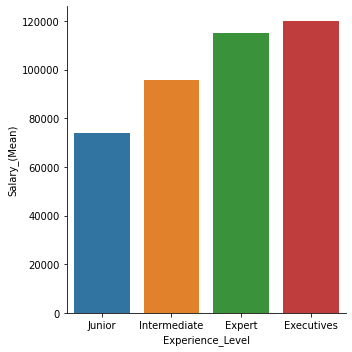

In [ ]:
sns.catplot(x='Experience_Level',y='Salary_(Mean)',data=df_for_barplot,kind='bar')